
# Aprendizaje de Máquina

## Amanda Balderas Mendoza

### Ejercicio 24 Sep. 2015

In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

Leemos los datos

In [2]:
datos = pd.read_csv("regLin4.csv")

In [3]:
datos.head()

,X,y
0,71.130300,0
1,36.872465,0
2,56.508402,0
3,78.120147,0
4,65.575073,0


Separamos los datos de entrenamiento y prueba

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(datos[['X']], datos['y'], train_size = 0.75)

Regresión lineal iterativa regularizada

In [5]:
def salida (w0, W, X1):
    V_X = w0
    for k in range(len(W)):
        V_X = V_X + (W[k] * X1[k])
        return V_X

In [6]:
def entrena(w0, W, X, Y, nu, lam):
    for i in range(len(X)):
        X1 = X.iloc[i]
        sal = salida(w0, W, X1)
        error = Y.iloc[i] - sal
        w0 = w0 + (nu * error)
        for j in range(len(X1)):
            W[j] = W[j] + (nu * error * X.iloc[i][j]) - (lam * W[j])
    return w0, W

Realizamos la transformación de los datos para la variable x.

In [7]:
X_scaler = preprocessing.StandardScaler().fit(X_train)

In [8]:
X_scaler_p = preprocessing.StandardScaler().fit(X_test)

In [9]:
Xscaler = X_scaler.transform(X_train)

In [10]:
Xscaler_p = X_scaler_p.transform(X_test)

In [11]:
Xscaler = pd.DataFrame(Xscaler)

In [12]:
Xscaler_p = pd.DataFrame(Xscaler_p)

Obtenemos la regresión regularizada

In [13]:
w0 = float(np.random.randint(-5, 5, 1))
W = list(np.random.randint(-5, 5, 1))
nu = 0.01
lam = 0.01

In [14]:
resul1 = entrena(w0, W, Xscaler, Y_train, nu, lam)
resul1

(0.31369635987555422, [-0.17583409681288162])

Obtenemos nuestros valores estimados con el resultado de la regresión.

In [15]:
y_est1 = float(resul1[0]) + (Xscaler[0] * float(resul1[1][0]))
y_est1 = pd.DataFrame(y_est1)
y_est1.head()

,0
0,0.192360
1,0.362733
2,0.009079
3,0.092801
4,0.488922


Graficamos 

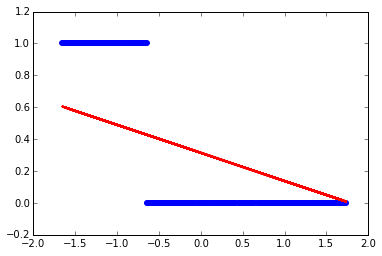

In [16]:
plt.scatter(Xscaler[0], Y_train, color = 'blue')
plt.plot(Xscaler[0], y_est1, color = 'red', linewidth = 2)
plt.show()

Definimos las funciones para entrenamiento, considerando que nuestra variable salida es discreta.

In [17]:
def salida2(w0, W, X1):
    V_X = w0
    for k in range(len(W)):
        V_X = V_X + (W[k] * X1[k])
    if V_X > 0:
        V_X = 1.0
    else:
        V_X = 0.0
    return V_X

In [18]:
def entrena2(w0, W, X, Y, nu, lam):
    suma_err = 0
    y_est = []
    for i in range(len(X)):
        X1 = X.iloc[i]
        sal = salida2(w0, W, X1)
        error = Y.iloc[i] - sal
        #suma_err = suma_err + error
        #y_est.insert(i, sal)
        w0 = w0 + (nu * error)
        for j in range(len(X1)):
            W[j] = W[j] + (nu * error * X.iloc[i][j]) - (lam * W[j])
    return w0, W
    #return error
    #return y_est

Nuevamente obtenemos la regresión considerando nuestra nueva función.

In [19]:
w0 = float(np.random.randint(-2, 2, 1))
W = list(np.random.randint(-2, 2, 1))
nu = 0.01
lam = 0.001

In [20]:
resul2 = entrena2(w0, W, Xscaler, Y_train, nu, lam)
resul2

(-0.020000000000000753, [-0.026828705095613341])

Obtenemos el valor de corte.

In [21]:
y1 = np.arange(-0.2, 1.2, 0.1)
x1 = -resul2[0] / resul2[1][0]
xs = [x1] * 14
x1

-0.74547019428346828

Graficamos

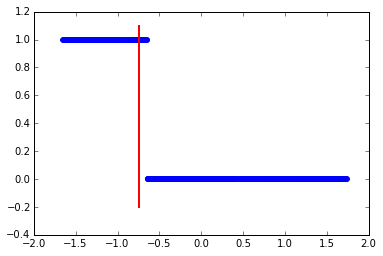

In [22]:
plt.scatter(Xscaler, Y_train, color = 'blue')
plt.plot(xs, y1, color = 'red', linewidth = 2)
plt.show()

# Caso AND

Generamos los valores de x1 y x2.

In [38]:
Xs = pd.DataFrame(np.random.randint(0, 2, 500), columns=['x1'])
Xs['x2'] = np.random.randint(0, 2, 500)
Xs.head()

,x1,x2
0,0,0
1,0,0
2,1,0
3,1,1
4,0,0


Graficamos

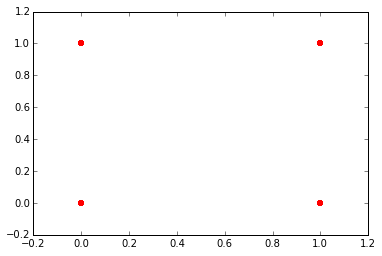

In [39]:
plt.scatter(Xs['x1'], Xs['x2'], color = 'red')

Obtenemos los valores de y en base a los valores obtenidos para nuestra x1 y x2.

In [40]:
Y = []
for i in range(len(Xs)):
    if Xs.iloc[i][0] == 0 and Xs.iloc[i][1] == 0:
        Y.insert(i, 0)
    elif Xs.iloc[i][0] == 0 and Xs.iloc[i][1] == 1:
        Y.insert(i, 0)
    elif Xs.iloc[i][0] == 1 and Xs.iloc[i][1] == 0:
        Y.insert(i, 0)
    else:
        Y.insert(i, 1)
Xs['y'] = Y
Xs.head()

,x1,x2,y
0,0,0,0
1,0,0,0
2,1,0,0
3,1,1,1
4,0,0,0


Obtenemos la regresión con los datos obtenidos

In [130]:
w0 = float(np.random.randint(0, 2, 1))
W = list(np.random.randint(-2, 3, 2))
nu = 0.01
lam = 0.001

In [131]:
resul3 = entrena2(w0, W, Xs[['x1', 'x2']], Xs['y'], nu, lam)
resul3

(0.26999999999999935, [-0.25904447289324828, -0.26186594771475691])

Obtenemos los valores para graficar la linea que corta los datos.

In [132]:
x1_0 = -resul3[0] / resul3[1][0]
x1_1 = (-resul3[0] - resul3[1][1]) / resul3[1][0]

In [133]:
x2_0 = -resul3[0] / resul3[1][1]
x2_1 = (-resul3[0] - resul3[1][0]) / resul3[1][1]

In [134]:
Xs_0 = pd.DataFrame([0, 1], columns=['x1_0'])
Xs_0['x2_0'] =[x2_0, x2_1]
Xs_0.head()

,x1_0,x2_0
0,0,1.031062
1,1,0.041836


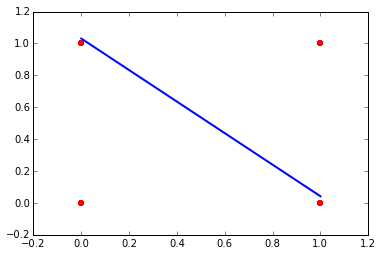

In [135]:
plt.scatter(Xs['x1'], Xs['x2'], color = 'red')
plt.plot(Xs_0['x1_0'], Xs_0['x2_0'], color = 'blue', linewidth = 2)
plt.show()